In [1]:

from importlib import reload
import os
import pandas as pd
from io import StringIO
import itertools
import ipdb
import datetime
from collections import Counter

import h5py
import json
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import joblib
print(tf.__version__)

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

from keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import mytf.s3utils as msu
import mytf.utils as mu
import mytf.validation as mv
import mytf.plot as mp

1.14.0


Using TensorFlow backend.


In [2]:
tf.enable_eager_execution()

In [ ]:
# In this notebook, going to do some plotting,
# associated with 2019-12-28-two.ipynb
# which is still running a model train..

In [3]:
workdir = 'history/2019-12-29T000509Z'

Text(0.5, 1.0, 'Train xentropy logloss on epoch=2,batch=910')

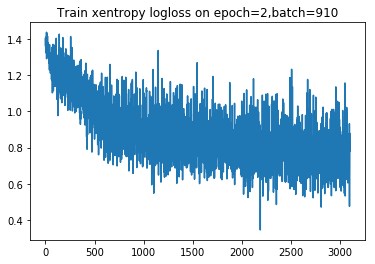

In [5]:
# Look at a most recent train loss plot so far..
historydir = 'history'
with open(f'{workdir}/epoch_002_batch_00910_train_loss_history.json') as fd:
    losshistory = json.load(fd)
    
plt.plot(losshistory) 
plt.title('Train xentropy logloss on epoch=2,batch=910')

Text(0.5, 1.0, 'Train xentropy logloss on epoch=2,batch=910')

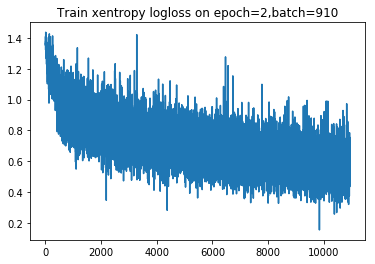

In [8]:
# Look at a most recent train loss plot so far..
historydir = 'history'
with open(f'{workdir}/epoch_009_batch_01090_train_loss_history.json') as fd:
    losshistory = json.load(fd)
    
plt.plot(losshistory) 
plt.title('Train xentropy logloss on epoch=2,batch=910')

In [10]:
ts = '2019-12-29T000509Z'
with open(f'{workdir}/epoch_006_batch_00600_validation_losses.json') as fd:
    batch_losses_vec = json.load(fd)

In [12]:
batch_losses_vec

{'batch_losses_vec': [[1.4803270101547241,
   1.0513440370559692,
   1.534023404121399,
   1.5512949228286743],
  [1.233873724937439,
   1.073665976524353,
   1.5134793519973755,
   1.574166178703308],
  [1.2491341829299927,
   0.9332689642906189,
   2.007120370864868,
   1.4428625106811523],
  [1.9173550605773926,
   0.39332115650177,
   2.0984182357788086,
   2.1318118572235107],
  [3.0079331398010254,
   0.2558949589729309,
   3.298619031906128,
   2.9812724590301514],
  [3.466482400894165,
   0.21102771162986755,
   3.9664459228515625,
   3.2732765674591064],
  [4.007164001464844,
   0.1189667358994484,
   4.4724273681640625,
   3.975036859512329],
  [5.425018787384033,
   0.053067490458488464,
   5.275328159332275,
   5.119890213012695],
  [5.590909481048584,
   0.04763505607843399,
   5.928332805633545,
   5.279109001159668],
  [5.999654769897461,
   0.03288821876049042,
   5.86484956741333,
   5.772319316864014],
  [5.772192001342773,
   0.047110628336668015,
   5.95481872558593

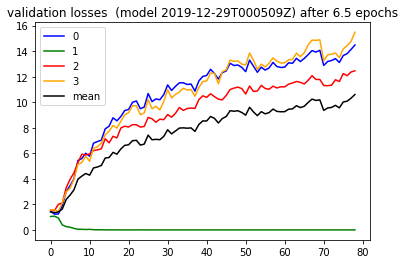

In [14]:
ts = '2019-12-29T000509Z'
with open(f'{workdir}/epoch_006_batch_00600_validation_losses.json') as fd:
    batch_losses_vec = json.load(fd)['batch_losses_vec']
    
lossesarr = np.array(batch_losses_vec)
meanlossesarr = np.mean(lossesarr, axis=1)

#batch_losses_vec[:5]
#batch_losses_vec = []
#for step in np.arange(0, 1068, 10):
# [2.8359528, 0.45356295, 1.7049086, 4.099845]

plt.plot([x[0] for x in batch_losses_vec], color='blue', label='0')
plt.plot([x[1] for x in batch_losses_vec], color='green', label='1')
plt.plot([x[2] for x in batch_losses_vec], color='red', label='2')
plt.plot([x[3] for x in batch_losses_vec], color='orange', label='3')
plt.plot(meanlossesarr, color='black', label='mean')
plt.title(f'validation losses  (model {ts}) after 6.5 epochs')
plt.legend()     
        